<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [18]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
jl = pd.read_csv('data/job_listings.csv')
soup = BeautifulSoup()
jl.head()
jl.shape

(426, 3)

In [40]:
desc_text = []

d1 = jl['description'][0]
soup = BeautifulSoup(jl['description'][0], 'html.parser')

# using a lambda function to parse the HTML in all the cells 
jl['description_text'] = jl['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').text)
jl.head()

,Unnamed: 0,description,title,description_text,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[""Job, Requirements:\nConceptual, understandin..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","['Job, Description\n\nAs, a, Data, Scientist, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"['As, a, Data, Scientist, you, will, be, worki..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","['$4,969, -, $6,756, a, monthContractUnder, th..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"['Location:, USA, \xe2\x80\x93, multiple, loca..."


## 2) Use Spacy to tokenize the listings 

In [30]:
# Use spacy to tokenize the job listing description text 
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [94]:
# Tokenizer Pipe
# Spacy to tokenize the data in a very basic way 
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(jl['description_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

jl['tokens'] = tokens
jl.head(2)

,Unnamed: 0,description,title,description_text,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, Description\n\nAs, a, Data, Scientist,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [51]:
##### Your Code Here ####
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(jl['description_text'])

# Get sparse dtm
dtm = vect.transform(jl['description_text'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [95]:
dtm.head(2)

,$,+,.\n\nabout,.\n\nperks\n\nhealth,/or,0,1,10,100,"100,000",...,you.\n\nabout,you\'ll,you\'re,you\n\nyou,you\xe2\x80\x99ll,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,|,||
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.032153,0.0,0.0,0.0,0.0,0.121241,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4) Visualize the most common word counts

#### Lesson here
- At first when creating a tokenizer, do it well so you do not have to keep going back and creating more and more iterations of the same things to get the results you want in the future. 

In [96]:
"""Using yesterdays funciton in order to get the word count for the entire column, although basic and not really telling, I know where I can clean this up."""

from collections import Counter
##### Your Code Here #####
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [97]:
# jl['tokens'] = tokenize(jl['tokens'])

wc = count(jl['tokens'])

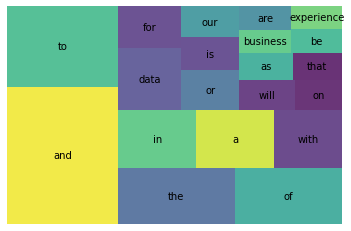

In [98]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [99]:
# jl['description_text'] = jl['description_text'].apply(lambda x: jl['description_text'][x].replace('\n\n', ''))
# jl.head()

In [100]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [101]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(jl['description_text'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,+,.\n\nabout,.\n\nperks\n\nhealth,/or,0,1,10,100,"100,000",...,you.\n\nabout,you\'ll,you\'re,you\n\nyou,you\xe2\x80\x99ll,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,|,||
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.032153,0.0,0.0,0.0,0.0,0.121241,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.202638,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.180043,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [67]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [70]:
nn.kneighbors([dtm.iloc[67].values])

(array([[0.        , 1.25997713, 1.29184934, 1.29254423, 1.2926794 ]]),
 array([[ 67, 179, 325, 371, 351]]))

In [77]:
jl['description_text'][67][:200]

"b'InternshipWho we are\\n\\nAt Criteo, we connect 1.5 billion active shoppers with the things they need and love. Our technology takes an algorithmic approach to predict what user we show an ad to, when"

In [79]:
jl['description_text'][325][:200]

"b'Sparkfund is an energy technology subscription company based in Washington, D.C. We give customers access to essential building energy functions and outcomes \\xe2\\x80\\x94 like cold air, light and re"

In [81]:
# description of future job I would be interested in: 

job = ["""
Maching Learning based knowledge in health and fitness to help predict customer addherance to program as well as interest in program. Working with multiple different porjects in the health and wellnesss
space. Having expert knowledge of the subject matter and the customers we work with is very important. 
"""]

new = tfidf.transform(job)

In [83]:
nn.kneighbors(new.todense())

(array([[1.27727819, 1.28364538, 1.28891616, 1.29151011, 1.30131565]]),
 array([[ 30, 406, 313, 201, 417]]))

In [84]:
jl['description_text'][30]

"b'InternshipOverview\\nEvery day at Perspecta, we enable hundreds of thousands of people to take on our nation\\xe2\\x80\\x99s most important work. We\\xe2\\x80\\x99re a company founded on a diverse set of capabilities and skills, bound together by a single promise: we never stop solving our nation\\xe2\\x80\\x99s most complex challenges. Our team of engineers, analysts, developers, investigators, integrators and architects work tirelessly to create innovative solutions. We continually push ourselves\\xe2\\x80\\x94to respond, to adapt, to go further. To look ahead to the changing landscape and develop new and innovative ways to serve our customers.\\n\\nPerspecta works with U.S. government customers in defense, intelligence, civilian, health care, and state and local markets. Our high-caliber employees are rewarded in many ways\\xe2\\x80\\x94not only through competitive salaries and benefits packages, but the opportunity to create a meaningful impact in jobs and on projects that matte

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 